## Libraries

In [141]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [142]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
#df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
#df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [143]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [144]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=1276.5, pvalue=0.6841300989550124)
0.7394765982560976
0.7397983699268292
Effect size: -0.031768378368642804
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=910.0, pvalue=0.15254374070864435)
0.7394765982560976
0.738302782292683
Effect size: -0.1117114041505266
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=1238.5, pvalue=0.5380406404648785)
0.738302782292683
0.7397983699268292
Effect size: -0.04808423173124512


### Specificity

In [145]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=2.6871562371911443e-05)
0.4820944640975609
0.5310113953658536
Effect size: -0.32784600762477434
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=57.0, pvalue=0.024001435738279366)
0.4820944640975609
0.4999693196951219
Effect size: -0.17625038790852451
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=4.0, pvalue=6.970098219192446e-05)
0.4999693196951219
0.5310113953658536
Effect size: -0.3105752773724949


### Time

In [146]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=3.662660943750367e-15)
107.08292682926829
26.365853658536587
Effect size: -0.6142285883619224
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=3.662968407211321e-15)
107.08292682926829
25.2609756097561
Effect size: -0.6142277679175001
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=473.5, pvalue=6.37745923842042e-08)
25.2609756097561
26.365853658536587
Effect size: -0.4222845994637372


### Size

In [147]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=604.5, pvalue=0.4413155444979794)
8.475609756097562
8.689024390243903
Effect size: -0.060124837958888254
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=644.0, pvalue=0.858487660285552)
8.475609756097562
8.570731707317073
Effect size: -0.013922862884068311
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=279.0, pvalue=0.12105417194547542)
8.570731707317073
8.689024390243903
Effect size: -0.12106308978805227


## Box-Plots

In [148]:
def box_plot(y1, y2, y3, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,1.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(3), labels=['ACTS', 'BDD', 'SPECGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

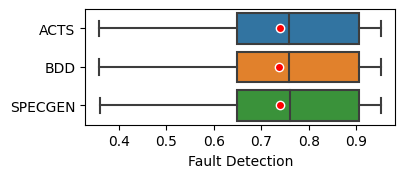

In [149]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

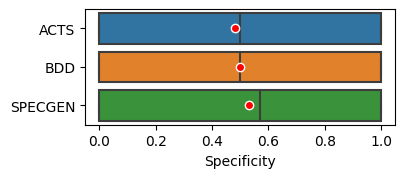

In [150]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

### Time

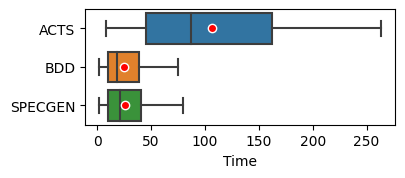

In [151]:
box_plot(timeACTS, timeBDD, timeSPEC, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

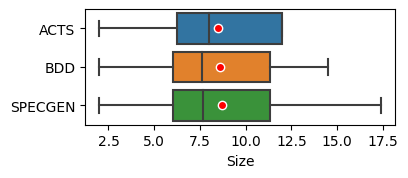

In [152]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, 'Size', xscale = 'linear', scale = 1, showfliers = False)